## Heart disease data analysis
Inspiration: https://compphysics.github.io/MachineLearning/doc/LectureNotes/_build/html/chapter7.html#an-overview-of-ensemble-methods


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns


X_train, X_test, y_train, y_test = np.load('All_heart_data.npy', allow_pickle=True)
#X_train, X_test, y_train, y_test = np.load('Heart_data_nofbs.npy', allow_pickle=True)
print(y_train.shape, y_test.shape)
# random forest (decision trees)
# bagging aka. bootstrap aggregation lect notes 10
# confusion matrix to see patterns in misclassifications
# gini index to evaluate feature importance

#seed = 0
#random.seed(seed); np.random.seed(seed)

import warnings
warnings.filterwarnings('ignore') 

(237, 1) (60, 1)


In [9]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=500, max_depth=None, criterion='entropy')

clf.fit(X_train, y_train.ravel())
y_pred=clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy random forest:", metrics.accuracy_score(y_test, y_pred))
# Logistic Regression
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)
print("Test set accuracy with Logistic Regression: {:.2f}".format(logreg.score(X_test, y_test)))

Accuracy random forest: 0.85
Test set accuracy with Logistic Regression: 0.87


###### Boosting with AdaBoost

learning rate and max depth decided in hyperparameter analysis below. Run pip install if module not recognized.

In [10]:
#pip install scikit.plot

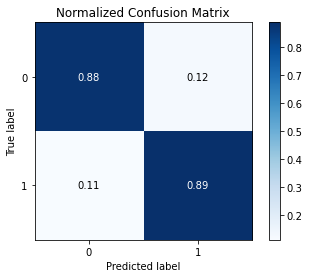

In [11]:
from sklearn.ensemble import AdaBoostClassifier
import scikitplot as skplt
#analyze depth, learning rate
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1, criterion='entropy'), n_estimators=500,
    algorithm="SAMME.R", learning_rate=0.1)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
#plt.savefig('treeconfusion')
plt.show()
'''
y_probas = ada_clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)
plt.show()
skplt.metrics.plot_cumulative_gain(y_test, y_probas)
plt.show()
''';

The confusion matrix tells us that 93% of predicted heart diseases correspond with the target, and 82% of predicted healthy hearts.

In [12]:
print(f'Overall accuracy with Ada boosted Random Forest: {metrics.accuracy_score(y_test, y_pred)}')

Overall accuracy with Ada boosted Random Forest: 0.8833333333333333


### Hyperparameter analysis

In [13]:
lambd = np.array([0.0001, 0.001, 0.01, 0.1, 1, 5]) #learning rate
maxd = np.array([1, 2, 3, 4, 5, 6])
test_accuracy = np.zeros((len(lambd), len(maxd)))

for i in range(len(lambd)):
    for j in range(len(maxd)):
        ada_clf = AdaBoostClassifier(
            DecisionTreeClassifier(max_depth=maxd[j], criterion='entropy'), n_estimators=500,
            algorithm="SAMME.R", learning_rate=lambd[i])
        ada_clf.fit(X_train, y_train)
        y_pred = ada_clf.predict(X_test)
        test_accuracy[i, j] = round(metrics.accuracy_score(y_test, y_pred), 4)
        #print(f'Accuracy, learning rate {a}, max depth {b}: {metrics.accuracy_score(y_test, y_pred)}')

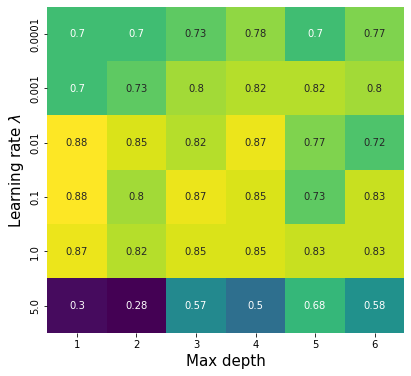

In [15]:
fig, ax = plt.subplots(figsize = (8, 6))
sns.heatmap(test_accuracy, annot=True, ax=ax, cmap="viridis", 
            yticklabels=lambd, xticklabels=maxd)
#ax.set_title("Accuracy score for boosted random forest prediction", fontsize = 15)
ax.set_xlabel("Max depth", fontsize=15)
ax.set_ylabel("Learning rate $\lambda$", fontsize=15)
fig.get_axes()[1].remove()#;plt.savefig('treeparameter')
plt.show()